In [38]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [39]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    image_size = (128,128),
    batch_size = 64
)

Found 6400 files belonging to 4 classes.


In [40]:
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [41]:
model = tf.keras.models.load_model("/Users/vivekgoel/Documents/Coding Mac /Alzheimer's Disease Detection/models/Trained_Model.h5")

In [42]:
root = "test"
ytrue = []
ypred = []
for i in os.listdir(root):
    if i !=".DS_Store":
        temp = os.path.join(root,i)
        expected = class_names.index(i)
        for j in os.listdir(temp):
            if j != ".DS_Store":
                img = tf.keras.utils.load_img(os.path.join(temp,j), target_size = (128,128),color_mode='rgb')
                img = tf.convert_to_tensor(img)
                pred = np.argmax(tf.nn.softmax(model.predict(tf.expand_dims(img, 0))[0]))
                ytrue.append(expected)
                ypred.append(pred)

1/1 [==============================] - 0s 69ms/step


In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytrue,ypred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       179
           1       1.00      1.00      1.00        12
           2       0.98      0.97      0.98       640
           3       0.99      0.91      0.95       448

    accuracy                           0.95      1279
   macro avg       0.94      0.96      0.95      1279
weighted avg       0.96      0.95      0.95      1279



In [44]:
model = tf.keras.models.load_model("/Users/vivekgoel/Documents/Coding Mac /Alzheimer's Disease Detection/models/model2.h5")
root = "test"
ytrue = []
ypred = []
for i in os.listdir(root):
    if i !=".DS_Store":
        temp = os.path.join(root,i)
        expected = class_names.index(i)
        for j in os.listdir(temp):
            if j != ".DS_Store":
                img = tf.keras.utils.load_img(os.path.join(temp,j), target_size = (128,128),color_mode='rgb')
                img = tf.convert_to_tensor(img)
                pred = np.argmax(tf.nn.softmax(model.predict(tf.expand_dims(img, 0))[0]))
                ytrue.append(expected)
                ypred.append(pred)

1/1 [==============================] - 0s 44ms/step


In [45]:
print(classification_report(ytrue,ypred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       179
           1       1.00      1.00      1.00        12
           2       0.98      0.98      0.98       640
           3       0.98      0.98      0.98       448

    accuracy                           0.98      1279
   macro avg       0.99      0.98      0.98      1279
weighted avg       0.98      0.98      0.98      1279



In [46]:
model = tf.keras.models.load_model("/Users/vivekgoel/Documents/Coding Mac /Alzheimer's Disease Detection/models/Trained_Model2.h5")
root = "test"
ytrue = []
ypred = []
for i in os.listdir(root):
    if i !=".DS_Store":
        temp = os.path.join(root,i)
        expected = class_names.index(i)
        for j in os.listdir(temp):
            if j != ".DS_Store":
                img = tf.keras.utils.load_img(os.path.join(temp,j), target_size = (128,128),color_mode='rgb')
                img = tf.convert_to_tensor(img)
                pred = np.argmax(tf.nn.softmax(model.predict(tf.expand_dims(img, 0))[0]))
                ytrue.append(expected)
                ypred.append(pred)

1/1 [==============================] - 0s 72ms/step


In [47]:
print(classification_report(ytrue,ypred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       179
           1       1.00      1.00      1.00        12
           2       0.99      0.99      0.99       640
           3       0.99      0.94      0.96       448

    accuracy                           0.97      1279
   macro avg       0.97      0.98      0.97      1279
weighted avg       0.97      0.97      0.97      1279



In [48]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    image_size=(128, 128),
    batch_size = 64
)

Found 1279 files belonging to 4 classes.


1/1 [==============================] - 0s 65ms/step


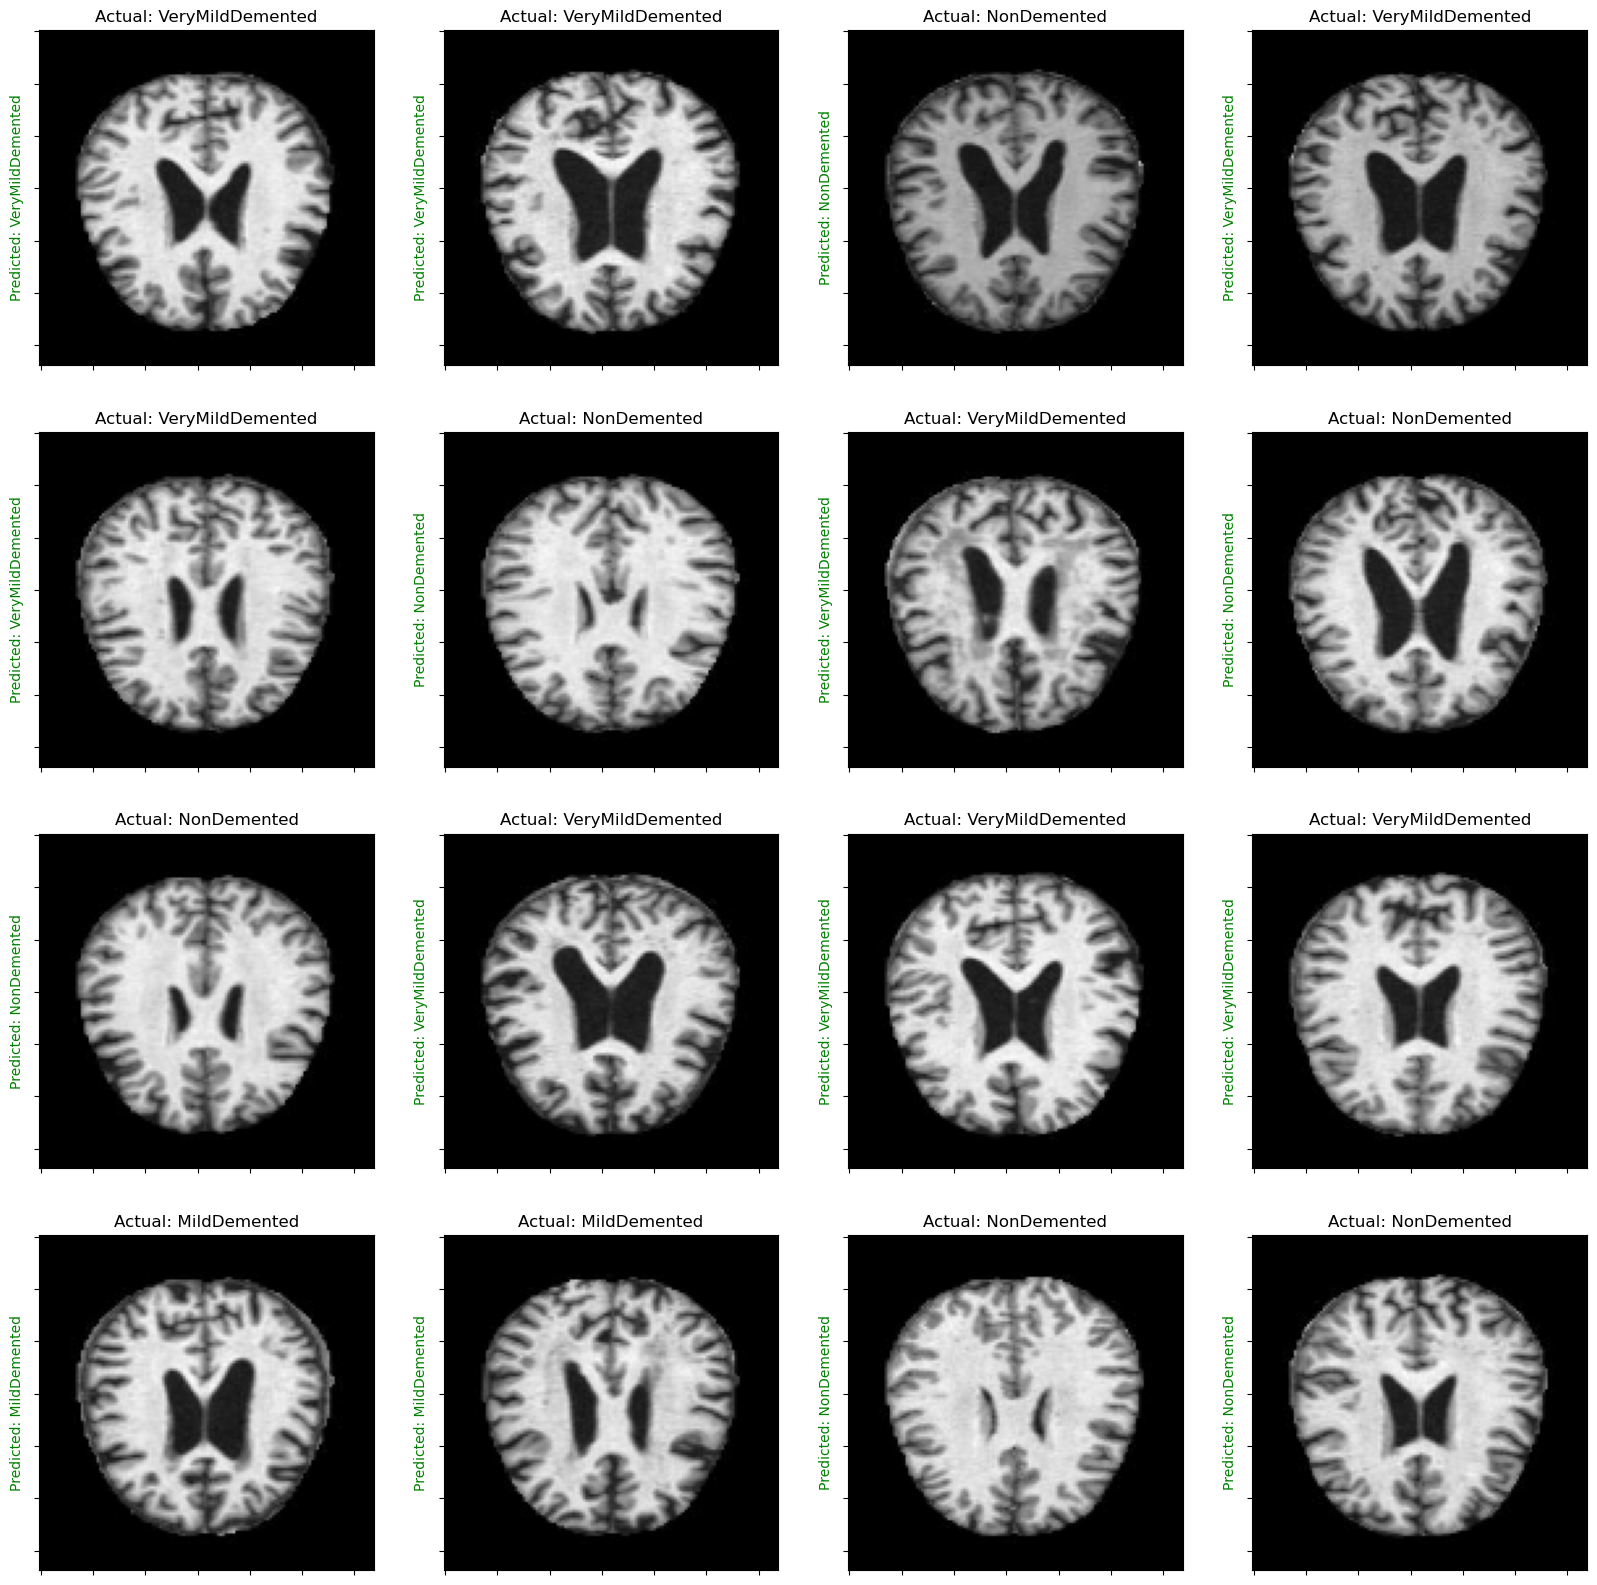

In [49]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [51]:
model.evaluate(test_ds)

20/20 [==============================] - 114s 6s/step - loss: 0.0155 - accuracy: 0.9945


[0.015526111237704754, 0.9945269823074341]

As the classification report of Trained_model2 is better than any one else....
We will be using the same model for predictions.